<a href="https://colab.research.google.com/github/ABDULRAFAY757/ABDULRAFAY757/blob/main/Kmean-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Mall_Customers (1).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
sns.countplot(x='Gender', data= data)

In [ ]:
sns.distplot(data['Age'])

In [ ]:
sns.distplot(data['Annual Income (k$)'])

In [ ]:
sns.distplot(data['Spending Score (1-100)'])

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [ ]:
X = data.iloc[:,[3,4]].values

In [ ]:
X

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)


In [ ]:
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

Y= kmeans.fit(X)

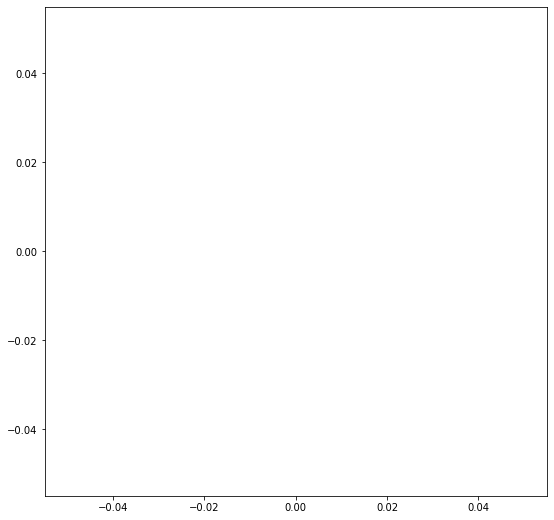

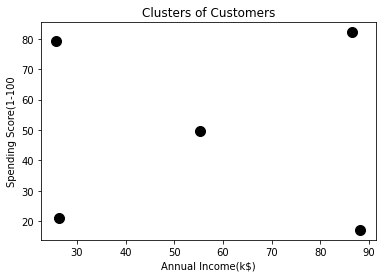

In [75]:
plt.figure(figsize=(9,9))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='brown',label='Cluster 1'  )
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='brown',label='Cluster 2'  )
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='brown',label='Cluster 3'  )
plt.scatter(X[Y==3,1],X[Y==3,1], s=50, c='brown',label='Cluster 4'  )
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='brown',label='Cluster 5'  )
plt.show()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()


